# 阅读笔记

** 作者：方跃文 **

** Email: fyuewen@gmail.com **

** 时间：始于2017年9月12日 **

** 第三章笔记始于2017年9月28日23:38 **


# 第三章 IPtyhon: 一种交互式计算和开发环境

IPython鼓励一种“执行探索——execute explore”精神，这就区别于传统的“编辑——编译——执行 edit——complie——run”

## IPython 基础

In [19]:
a = 5

In [20]:
a

5

In [21]:
import numpy as np
from numpy.random import randn
data = {i: randn() for i in range(7)}
print(data)
data1 = {j: j**2 for j in range(5)}
print(data1)

{0: 1.6677199594835443, 1: -0.5348338544580333, 2: -0.5804083436299905, 3: -2.156324071346383, 4: -0.49482409755600865, 5: -0.9700971146231592, 6: -0.12183027886180367}
{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}


### Tab 键自动完成

在python shell中，输入表达式时候，只要按下Tab键，当前命名空间中任何已输入的字符串相匹配的变量（对象、函数等）就会被找出来：

In [22]:
an_apple = 27

In [23]:
an_example = 42

In [24]:
an_ #按下tab键就会看到之前定义的变量会被显示出来，方便我们做出选择。


NameError: name 'an_' is not defined

此外，我们还可以在任何对象之后输入一个句点来方便地补全方法和属性的输入：

In [ ]:
import IPython
print(IPython.sys_info())

In [ ]:
a = [1,2,3]


In [ ]:
a.append(0)
a

In [ ]:
import datetime

In [ ]:
dt = datetime.time(22,2,2)

In [ ]:
dd = datetime.date(2017,2,2)

In [ ]:
print("%s %s" % (dt,dd))

Tab键自动完成成功不只可以搜索命名空间和自动完成对象或模块属性。当我们输入任何看上去像文件路径的东西时（即便是在一个Python字符串中），按下Tab键即可找出电脑文件系统中与之匹配的东西。

In [ ]:
./  #按下Tab键， 如果你当前目录下有文件或者目录，会给出提示。

### 内省

在变量的前面或者后面加上一个问号就可以将有关该对象的一些通用信息显示出来，这个就是内省，即object introspection.

In [ ]:
b=[1,2,3]
    

In [ ]:
b?

上面执行完，jupyter会跳出一个小窗口并且显示如下：

>Type:        list

>String form: [1, 2, 3]

>Length:      3

>Docstring:  

>list() -> new empty list

>list(iterable) -> new list initialized from iterable's items

如果对象是一个函数或者实例方法，则它的docstring(如果有的话)也会显示出来。例如：

In [29]:
def add_numbers(a,b):
    #引号部分则为docstring
    """
    Add two numbers together
    
    Returns
    -------
    the_sum: type of arguments
    """
    
    return a+b

add_numbers(1,2)


In [32]:
add_numbers?
#加一个问号执行会显示上述我已经编写好的docstring，这样在忘记函数作用的时候还是很不错的功能。

In [36]:
add_numbers??
#加两个问号则会显示该函数的源代码

?还有一个用法，**即搜索IPython的命名空间**，类似于标准UNIX或者Windows命令行中的那种用法。一些字符再配以通配符即可显示出所有与该通配符表达式相匹配的名称。例如我们可以列出NumPy顶级命名空间中含有“load"的所有函数。

In [38]:
import numpy as np
np.*load*?

#上述执行后，jupyter notebooK会给出：

>np.__loader__

>np.load

>np.loads

>np.loadtxt

>np.pkgload

### %run命令

在IPython会话中，所有文件都可以通过%run命令当作Python程序来运行。假设当前目录下的chapter03文件夹中有个simple01.py的脚本，其中内容为

In [46]:
def f(x,y,z):
    return (x+y)/z
a=5
b=6
c=8

result = f(a,b,c)
print(result)

In [48]:
#执行
%run ./chapter03/simple01.py

1.375


上述脚本simple01.py是在一个空的命名空间中运行的，没有任何import，也没有定义任何其他的变量，所以其行为跟在命令行运行是一样的。此后，该脚本中所定义的变量(包括脚本中的import、函数、全局变量)就可以在当前jupyter notebook中进行访问（除非有其他错误或则异常）

In [49]:
result

1.375

** 如果Python脚本中需要用到命令行参数（通过 sys.argv访问），可以将参数放到文件路径的后面，就像在命令行执行那样。**

**  如果希望脚本执行的时候会访问当前jupyter notebook中的变量，应该用…%run -i script.py**，例如

我在chapter03文件夹中写下

x = 32

add = x + result

print('add is %d' % (add))


In [52]:
%run -i ./chapter03/simple02.py  #-i即interactive

add is 33


### 中断执行的代码

任何代码在执行时候（无论是通过%run执行的脚本还是长时间运行的命令），只要按下按下“Ctrl+C”,就会引发一个keyboardInterrupt。出一些特殊的情况之外，绝代分python程序都将因此立即停止执行。

例如：

当python代码已经调用了某个已编译的扩展模块时，按下Ctrl+C将无法立即停止执行。
在这种情况下，要么需要等待python解释器重新获得控制权，要么只能通过
操作系统的任务管理器强制执行终止python进程。

### 执行剪贴板中的代码

在IPython shell（注意，我这里强调一下，并不是在jupyter notebook中，而是ipython shell,虽然我有时候
把他们两个说的好像等效一样，但是两者还是不同的）中执行代码的最简单方式就是粘贴剪贴板中的代码。虽然这种做法很粗糙，
但是在实际工作中就很有用。比如，在开发一个复杂或耗时的程序时候，我们可能需要一段
一段地执行脚本，以便查看各个阶段所加载的数据以及产生的结果。又比如说，在网上找到了
一个何用的代码，但是又不想专门为其新建一个.py文件。

多数情况下，我们可以通过“Ctrl-Shift-V”将粘贴版中的代码片段粘贴出来(windows中)。

%paste 和 %cpaste 这两个魔术函数可以粘贴剪贴板中的一切文本。在ipython shell中这两个函数
可以帮助粘贴。后者%cpaste相比于%paste只是多了粘贴代码的特殊提示符，可以一行一行粘贴。

In [ ]:
#下面我把我在ipython中执行的代码
$ ipython
Python 3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
Type 'copyright', 'credits' or 'license' for more information
IPython 6.2.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: %cpaste
Pasting code; enter '--' alone on the line to stop or use Ctrl-D.
:x = 1
:if x == 1:
:    print("x is 1.")
:
:--
x is 1.


### IPython 跟编辑器和IDE之间的交互

某些文本编辑器（EMACS, VIM）带有一些能将代码块直接发送到ipython shell的第三方扩展。某些IDE中也
预装有ipython。

 对于我自己而言，我喜欢用git bash，然后在里面折腾vim. 当然我有时候也用IDE

### 键盘快捷键

IPython提供了许多用于提示符导航（Emacs文本编辑器或者UNIX bash shell的用户对此会很熟悉）和查阅历史shell命令的快捷键。因为我不喜欢在ipython shell中写code，所以我就跳过了。如果有人读到我的笔记发现这里没有什么记录的话请自行查找原书。

### 异常和跟踪

如果%run某段脚本或执行某条语句发生了一场，IPython默认会输出整个调用栈跟踪traceback，其中还会附上调用栈各点附近的几行代码作为上下文参考。

In [1]:
%run ./pydata-book/ch03/ipython_bug.py

AssertionError: 

** 拥有额外的上下文代码参考是它相对于标准python解释器的一大优势。上下文代码参考的数量可以通过%mode魔术命令进行控制，既可以少（与标准python解释器相同）也可以多（带有函数参数值以及其他信息）。本章后面还会讲到如果在出现异常之后进入跟踪栈进行交互式的事后调试post-mortem debugging.**

### 魔术命令

IPython有一些特殊命令（魔术命令Magic Command)，它们有的为常见任务提供便利，有的则使你能够轻松控制IPtython系统的行为。魔术命令是以百分号%为前缀的命令。例如，我们可以通过 %timeit 这个魔术命令检测任意Python语句（如矩阵乘法）的执行时间（稍后对此进行详细讲解）：

In [8]:
import numpy as np
from numpy.random import randn

a = randn(10,10)
a

array([[ 0.58374247, -0.23965358, -0.3886003 , -0.45802874, -0.68481929,
        -0.74332562, -0.21857992, -0.2885454 , -0.88746162,  0.0977261 ],
       [-2.55800955, -0.82293058, -0.56242922, -0.28436034,  1.0503696 ,
         0.53285119,  0.26743058, -0.41142808,  0.26455599,  0.51785872],
       [-1.17394989,  1.17300154, -1.7814229 , -0.64553171,  0.11747312,
         0.17263816, -0.65611883,  0.48209263,  0.34743226, -0.81561115],
       [ 0.63508134,  0.45129603,  0.23806689, -1.31508501,  0.06025293,
        -0.38627299,  0.67136614,  1.16982449,  0.9717334 , -0.54597953],
       [ 0.06671008, -0.6515207 ,  0.79550036,  0.07295373, -1.32646297,
         1.18109434, -1.39730114, -0.76126514, -1.19605987,  1.34912612],
       [ 0.24233679, -0.11198976, -0.26772268, -0.5011582 ,  0.61053853,
        -0.10167784,  0.5198661 ,  1.1551277 , -1.67137141,  0.10618815],
       [-0.74289054,  0.03434461, -0.58670471,  0.92239095,  0.15990761,
         1.16458131,  0.45899187, -0.37996096

In [9]:
%timeit np.dot(a,a)

1.58 µs ± 23.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


魔术命令可以看作运行于IPython系统中的命令行程序。它们大都还有一些“命令行”，使用“？”即可查看其选项

In [1]:
%reset?

上面执行后，会跳出它的docstring

In [3]:
a = 1

In [4]:
a

1

In [5]:
'a' in _ip.user_ns  # 不知道为什么这里没有执行通过？

NameError: name '_ip' is not defined

In [10]:
%reset -f

In [9]:
'a' in __ip.user__ns

NameError: name '__ip' is not defined

** 常用的python魔术命令**

| 命令  | 功能|
| ------------- | ------------- |
| %quickref  | 显示IPython的快速参考  |
| %magic  | 显示所有魔术命令的详细文档  |
| %debug  |  从最新的异常跟踪的底部进入交互式调试器|
| %hist   | #打印命令的输入（可选输出）历史 |
| %pdb    | 在异常发生后自动进入调试器 |
| %paste  | 执行粘贴版中的python代码 |
| %reset | 删除interactive命名空间中的全部变量、名称 |
| %page *OBJECT*  | 通过分页器打印输出 *OBJECT* |
| %run *script.py* | 在IPython中执行脚本 |
| %run *statement* | 通过cProfile执行statement，并打印分析器的输出结果|
| %time *statement* | 报告statement的执行时间|
| %timeit *statement* |  多次执行statement以计算系统平均执行时间。对那些执行时间非常小的代码很有用|
| %who、%who_ls、%whos | 显示interactive命名空间中定义的变量，信息级别、冗余度可变 |
| %xdel variable | 删除variable，并尝试清楚其在IPython中的对象上的一切引用 |




### 基于Qt的富GUI控制台

IPython团队开发了一个基于Qt框架（其摩的是为终端应用程序提供诸如内嵌图片、多行编辑、语法高亮之类的富文本编辑功能）的GUI控制平台。如果你已经安装了PyQt或者Pyside，使用下面命令来启动的话即可为其添加绘图功能。

ipython qtconsole --pylab=inline

Qt控制台可以通过标签页的形式启动多个IPython进程，这就使得我们可以在多个任务之间轻松地切换。它也开业跟IPython HTML Notebote （即我现在用的jupyter noteboo)共享同一个进程，稍后我们对此进行演示说明。

#### matplotlib 集成与pylab模式

导致Ipython广泛应用于科学计算领域的部分原因是它跟matplotlib这样的库以及GUI工具集默契配合。

通常我们通过在启动Ipython时候添加--pylab标记来集成matplotlib

In [ ]:
#在termnal 输入
ipython --pylab

#回显中会出现部分关于matplotlib的字段
#IPython 6.2.0 -- An enhanced Interactive Python. Type '?' for help.
#Using matplotlib backend: Qt5Agg

上述的操作会导致几个结果：

1. IPython 会启动默认GUI后台集成，这样matplotib绘图窗口创建就不会出现问题；

2. Numpy和matplotlib的大部分功能会被引入到最顶层的interactive命名空间以产生一个交互式的计算环境（类似matlab等）。也可以通过%gui对此进行手工设置（详情请执行%gui?）

In [10]:
#原书给了一个在ipython命令行的例子
#但是，我这里用jupyter notebook来进行演示
%matplotlib inline
import matplotlib.pylab as plab

img=plab.imread('pydata-book/ch03/stinkbug.png')

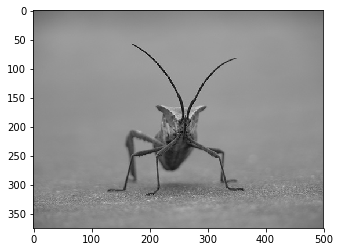

In [11]:
plab.imshow(img)

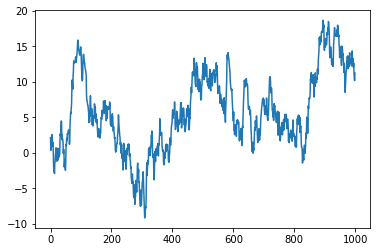

In [23]:
%matplotlib inline
import matplotlib.pylab as plab
from numpy.random import randn
plab.plot(randn(1000).cumsum())

### 使用命令历史

IPython 维护者一个位于硬盘上的小型数据库。其中含有你执行过的每条命令的文本。这样做有几个目的：

* 只需很少的按键次数即可搜索、自动完成并执行之前已经执行过的命令

* 在会话间持久化历史命令

* 将输入/输出历史纪录到日志中去

#### 搜索并重用命令历史

IPython倡导迭代、交互的开发模式：我们常常发现自己总是重复一些命令，假设我们已经执行了

In [24]:
#在ipython terminal执行
%run chapter03/simple01.py

1.375


如果我们想在修改了simple01.py（当然也可以不改）后再次执行上面的操作，只需要输入 %run 命令的前几个字符并按下“ctrl+P”键或者向上箭头就会在命令历史的第一个发现它. (可能是因为我用的是git bash on windows,我自己并未测试成功书中的这个操作;但是在Linux中，我测试是有效的)。此外，ctrl-R可以实现部分增量搜索，跟Unix shell中的readline所提供的功能一样,并且ctrl-R将会循环搜索命令历史中每一条与输入相符的行。

例如，第一次ctrl-R后，我输入了c，ipython返回给我的是：

> In [6]: c=a+b

> I-search backward: c

再按依次ctrl-R,则变成了历史中含c这个关键字的另一个命令

> In [6]: c = c + 1

> I-search backward: c

#### 输入和输出变量

IPython shell和jupyter notebook中，最近的两个输出分别保存在 \_ 和 \__ 两个变量中

In [1]:
a=3

In [2]:
a

3

In [3]:
b=4

In [4]:
b

4

In [5]:
__

3

In [6]:
c=5
c

5

In [7]:
_

5

输入的文本被保存在名为 \_iX 的变量中，其中X是输入行的行号。每个输入变量都有一个对应的输出变量 \_X。例如：

In [8]:
foo = 'bar'

In [9]:
foo

'bar'

In [10]:
_i9

'foo'

In [11]:
_9

'bar'

由于输入变量是字符串，因此可用python的exec关键字重新执行: exec \_i9

有几个魔术命令可用于输入、输出历史。%hist用于打印全部或部分历史，可以选择是否带行号

In [13]:
%hist

a=3
a
b=4
b
__
c=5
c
_
foo = 'bar'
foo
_i9
_9
exec _i9
%hist


%reset 用于清空 interactive 命名空间，并可选择是否清空输入和输出缓存。%xdel 用于从IPython系统中移除特定对象的一切引用。

In [14]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [16]:
a #由于上面已经清理了命名空间，所以python并不知道a是多少。

NameError: name 'a' is not defined

**注意：**在处理大数据集时，需注意IPython的输入和输出历史，它会导致所有对象引用都无法被垃圾收集器处理（即释放内存），即使用del关键字将变量从interactive命名空间中删除也不行。对于这种情况，谨慎地使用%xdel和%reset将有助于避免出现内存方面的问题。

#### 记录输入和输出

IPython能够记录整个控制台会话，包括输入和输出。执行 %logstart 即可开始记录日志

In [17]:
%logstart

Activating auto-logging. Current session state plus future input saved.
Filename       : ipython_log.py
Mode           : rotate
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


IPython的日志功能开在任何时刻开气，以便记录整个会话。%logstart的具体选项可以参考帮助文档。此外还可以看看几个与之配套的命令：%logoff, %logon, %logstate, 以及 %logstop

In [18]:
%logstart?

### 与操作系统交互

IPython 的另一重要特点就是它跟操作系统的shell结合地非常紧密。即我们可以直接在IPython中实现标准的Windows或unix命令行活动。例如，执行shell命令、更改目录、将命令的执行结果保存在Python对象中等。此外，它还提供了shell命令别名以及目录书签等功能。

下表总结了用于调用shell命令的魔术命令及其语法。本笔记后面还会介绍这些功能。

| 命令 | 说明|
| ------------- | ------------- |
| !cmd | 在系统shell中执行cmd |
| output = !cmd args | 执行cmd，将stdout存放在output中|
| %alias alias_name cmd | 为系统shell命令定义别名|
| %bookmark | 使用IPtyhon的目录书签功能|
| %cd directory | 将系统工作目录更改为directory|
| %pwd | 返回当前工作目录 |
| %pushed directory | 将当前目录入栈，并转向目标目录 (这个不懂？？)|
| %popd | 弹出栈顶目录，并转向该目录 |
| %dirs | 返回一个含有当前目录栈的列表 |
| %dhist | 打印目录访问历史 |
| %env | 以dict形式返回系统环境变量 |


#### shell 命令和别名

在 IPython 中，以感叹号开头的命令行表示其后的所有内容需要在系统shell中执行。In other words, 我们可以删除文件（如rm或者del）、修改目录或执行任意其他处理过程。甚至我们还可启动一些将控制权从IPython手中夺走的进程（比如另外再启动一个Python解释器）：

yang@comet-1.edu  ~ 19:17:51 >ipython
Python 3.6.1 |Continuum Analytics, Inc.| (default, May 11 2017, 13:09:58)
Type 'copyright', 'credits' or 'license' for more information
IPython 6.1.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]:

In [1]: !python
Python 3.6.1 |Continuum Analytics, Inc.| (default, May 11 2017, 13:09:58)
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux
Type "help", "copyright", "credits" or "license" for more information.


此外，还可将shell命令的控制台输出存放到变量中，只需要将 ！开头的表达式赋值给变量即可。例如在Linux中

In [ ]:
In [4]: my_current_dir = !pwd

In [5]: my_current_dir
Out[5]: ['/home/ywfang']

In [ ]:
返回的python对象my_current_dir实际上是一个含有控制台输出结果的自定义列表类型。

在使用！时，IPython 还允许使用当前环境中定义的python值。只需在变量名前面加上美元符号（$）即可：

In [ ]:
#在ipython shell中
In [1]: foo = 'note*'

In [2]: !ls $foo
notebook.log

魔术命令 %alias 可以为shell命令自定义简称。例：

In [3]: %alias ll ls -l

In [4]: ll
total 426
drwxr-xr-x 1 YWFANG 197609      0 9月  21 22:47 appendix-A
-rw-r--r-- 1 YWFANG 197609  47204 10月  8 10:48 appendix-A-note.ipynb

可以一次执行多条命令，只需要将她们写在一行并以分号隔开(在Windows中，这个可能不可行，但是Linux可以通过)

In [3]: %alias test_fang (ls -l; cd ml; ls -l; cd ..)

In [4]: test_fang
total 211
drwxr-xr-x  2 ywfang yun112     2 Aug 22 18:45 Desktop
-rw-r--r--  1 ywfang yun112 11148 Jul  2 22:02 bashrc-fang-20170703
drwxr-xr-x  9 ywfang yun112     9 Jul  7 01:45 glibc-2.14
drwxr-xr-x  3 ywfang yun112     3 Jul  2 23:10 intel
-rwxr-xr-x  1 ywfang yun112   645 Sep 19 04:51 jupter_notebook
drwxr-xr-x  3 ywfang yun112     5 Jul  7 18:51 materials
drwxr-xr-x 20 ywfang yun112    21 Aug 22 18:02 miniconda3
drwxr-xr-x  3 ywfang yun112     3 Sep  4 18:39 ml
-rw-r--r--  1 ywfang yun112   826 Sep 30 08:35 notebook.log
drwxr-xr-x  3 ywfang yun112     4 Aug 22 18:21 pwwork
drwxr-xr-x  6 ywfang yun112    14 Aug 22 19:04 software
drwxr-xr-x  5 ywfang yun112     6 Sep  4 18:56 tensorflow
drwxr-xr-x  5 ywfang yun112     6 Sep  4 18:53 tf1.2-py3.6
drwxr-xr-x  5 ywfang yun112     6 Sep  4 18:54 tf12-py36
drwxr-xr-x  6 ywfang yun112   518 Jun 20 01:33 tool
total 1
drwxr-xr-x 3 ywfang yun112 3 Sep  4 18:39 tensorflow

注意，IPython会在会话结束时立即"忘记"我们前面所定义的一切别名。如果要进行永久性的别名设置，需要使用配置系统。之后会进行介绍。

### 目录书签系统

IPython 有一个简单的目录书签系统，它使我们能保存常用目录的别名以便方便地快速跳转。比如，作为一个狂热的dropbox用户，为了能够快速地转到dropbox目录，可以定义一个书签：

In [11]:
%bookmark db D:\PhDinECNU #windows中的写法；如果是Linux，应该为/d/PhDinECNU/
%bookmark dt D:\temp

In [9]:
%cd db

(bookmark:db) -> D:\PhDinECNU
D:\PhDinECNU


定义好之后就可以在ipython shell(或jupyter notebook)中使用魔术命令%cd db来使用这些标签

如果书签的名字与当前工作目录中某个名字冲突时，可通过 -b 标记（起作用是覆写）使用书签目录。%bookmark的 -l 选项的作用是列出所有书签。

In [12]:
%bookmark -l

Current bookmarks:
db -> D:\PhDinECNU
dt -> D:\temp


### 软件开发工具

IPython 不仅是交互式环境和数据分析环境，同时也非常适合做开发环境。在数据分析应用程序中，最重要的是要拥有正确的代码。IPython继承了Python内置的 ** pdb ** 调试器。 此外，IPython 提供了一些简单易用的代码运行时间以及性能分析的工具。

#### 交互式调试器

IPython的调试器增加了 ** pdb **，如 Tab 键自动完成、语法高亮、为异常跟踪的每条信息添加上下文参考等。**调试代码的最佳时机之一就是错误刚发生的时候。** %debug 命令（在发生异常之后立即输入）将会条用那个“时候”调试器，并直接跳转到发生异常的那个** 栈帧 ** （stack frame）

In [13]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [14]:
%cd D:\PhDinECNU\readingnotes\readingnotes\machine-learning\McKinney-pythonbook2013

D:\PhDinECNU\readingnotes\readingnotes\machine-learning\McKinney-pythonbook2013


In [15]:
%run pydata-book/ch03/ipython_bug.py

AssertionError: 

In [ ]:
%debug

> d:\phdinecnu\readingnotes\readingnotes\machine-learning\mckinney-pythonbook2013\pydata-book\ch03\ipython_bug.py(9)throws_an_exception()
      7     a = 5
      8     b = 6
----> 9     assert(a + b == 10)
     10 
     11 def calling_things():

ipdb> u
> d:\phdinecnu\readingnotes\readingnotes\machine-learning\mckinney-pythonbook2013\pydata-book\ch03\ipython_bug.py(13)calling_things()
     11 def calling_things():
     12     works_fine()
---> 13     throws_an_exception()
     14 
     15 calling_things()

ipdb> d
> d:\phdinecnu\readingnotes\readingnotes\machine-learning\mckinney-pythonbook2013\pydata-book\ch03\ipython_bug.py(9)throws_an_exception()
      7     a = 5
      8     b = 6
----> 9     assert(a + b == 10)
     10 
     11 def calling_things():



在这个 pdb 调试器中，我们可以执行任意Python 代码并查看各个栈帧中的一切对象和数据，这就相当于解释器还留了条后路给我们。默认是从最低级开始的，即错误发生的地方，在上面ipdb>后面输入u (up) 或者 d (down) 即可在栈跟踪的各级别之间进行切换。

In [ ]:
执行%pdb命令可以让IPython在出现异常之后直接调用调试器，很多人都认为这一功能很实用。

此外调试器还能为代码开发提供帮助，尤其当我们想设置断点或者对函数/脚本进行单步调试时。实现这个目的的方式如下所述。

用带有 -d 选项的 %run 命令，这将会在执行脚本文件中的代码之前先打开调试器。必须立即输入 s（或step）才能进入脚本：

In [ ]:
%run -d ./pydata-book/ch03/ipython_bug.py

Breakpoint 1 at d:\phdinecnu\readingnotes\readingnotes\machine-learning\mckinney-pythonbook2013\pydata-book\ch03\ipython_bug.py:1
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> d:\phdinecnu\readingnotes\readingnotes\machine-learning\mckinney-pythonbook2013\pydata-book\ch03\ipython_bug.py(1)<module>()
1---> 1 def works_fine():
      2     a = 5
      3     b = 6
      4     assert(a + b == 11)
      5 

ipdb> s
> d:\phdinecnu\readingnotes\readingnotes\machine-learning\mckinney-pythonbook2013\pydata-book\ch03\ipython_bug.py(6)<module>()
      4     assert(a + b == 11)
      5 
----> 6 def throws_an_exception():
      7     a = 5
      8     b = 6



在此之后，上述文件执行的方式就全凭我们自己说了算了。比如说，在上面那个异常中，我们可以在调用 works_fine 方法的地方设置一个断点，然后输入 c (或者 continue) 使脚本一直运行下去直到该断点时为止。

In [ ]:
%run -d ./pydata-book/ch03/ipython_bug.py

Breakpoint 1 at d:\phdinecnu\readingnotes\readingnotes\machine-learning\mckinney-pythonbook2013\pydata-book\ch03\ipython_bug.py:1
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> d:\phdinecnu\readingnotes\readingnotes\machine-learning\mckinney-pythonbook2013\pydata-book\ch03\ipython_bug.py(1)<module>()
1---> 1 def works_fine():
      2     a = 5
      3     b = 6
      4     assert(a + b == 11)
      5 

ipdb> s
> d:\phdinecnu\readingnotes\readingnotes\machine-learning\mckinney-pythonbook2013\pydata-book\ch03\ipython_bug.py(6)<module>()
      4     assert(a + b == 11)
      5 
----> 6 def throws_an_exception():
      7     a = 5
      8     b = 6

ipdb> b 12
Breakpoint 2 at d:\phdinecnu\readingnotes\readingnotes\machine-learning\mckinney-pythonbook2013\pydata-book\ch03\ipython_bug.py:12
ipdb> c
> d:\phdinecnu\readingnotes\readingnotes\machine-learning\mckinney-pythonbook2013\pydata-book\ch03\ipython_bug.py(12)calling_things()
     10 
     11 def calling_things():
2--> 12 

** 如果想精通这个调试器，必须经过大量的实践。**

虽然大部分 IDE 都会自带调试器，但是 IPython 中调试程序的方法往往会带来更高的生产率。

下面是常用的 IPython 调试器命令

|命令 | 功能 |
|------| ------|
| h(elp) | 显示命令列表 |
| help *command* | 显示 *command* 的文档 |
| c(ontinue) | 恢复程序的执行 |
| q(uit) | 推出调试器，不再执行任何代码 |
| b(reak) *number* | 在当前文件的第 *number* 行设置一个断点 |
| b path/to/file.py:*number* | 在制定文件的第 *numbe* 行设置一个断点 |
| s(tep) | 单步进入函数调用 |
| n(ext) | 执行当前行，并前进到当前级别的下一行 |
| u(p)/d(own) | 在函数调用栈中向上或者向下移动 |
| a(rgs) | 显示当前函数的参数 |
| debug *statement* | 在新的（递归）调试其中调用语句 *statement* |
| l(ist) *statement* | 显示当前行，以及当前栈级别上的上下文参考代码 |
| w(here) | 打印当前位置的完整栈跟踪 （包括上下文参考代码） |

#### 调试器的其他使用场景

第一，使用 set_trace 这个特别的函数（以 pdb.set_trace 命名），这差不多可算作一种 “穷人的断点”（意思是这种断点方式很随便，是硬编码的）。下面这两个方法可能会在我们的日常工作中排上用场（我们也可像作者一样直接将其加入IPython配置中）：

第一个函数 set_trace 很简单。我们可以将其放在代码中任何希望停下来查看一番的地方，尤其是那些发生异常的地方：

In [ ]:
%run ./pydata-book/ch03/ipython_bug.py